In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [12]:
import pandas as pd
df = pd.read_csv("extended_vendor_data_1000.csv")


In [13]:
def performance(row):
    if (row['Rating'] >= 4.0 and
        row['On_Time_Delivery_%'] >= 85 and
        row['Defect_Rate_%'] <= 3):
        return "Good"
    else:
        return "Bad"

df['Vendor_Performance'] = df.apply(performance, axis=1)


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Vendor_Risk_Level'] = le.fit_transform(df['Vendor_Risk_Level'])
df['Vendor_Performance'] = le.fit_transform(df['Vendor_Performance'])


In [16]:
X = df[['Rating','Total_Orders','On_Time_Delivery_%',
        'Late_Deliveries','Avg_Delivery_Days',
        'Payment_Delay_Days','Contract_Value_Lakhs',
        'Defect_Rate_%','Vendor_Risk_Level','Fraud_Flag']]

y = df['Vendor_Performance']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       190
           1       1.00      0.50      0.67        10

    accuracy                           0.97       200
   macro avg       0.99      0.75      0.83       200
weighted avg       0.98      0.97      0.97       200



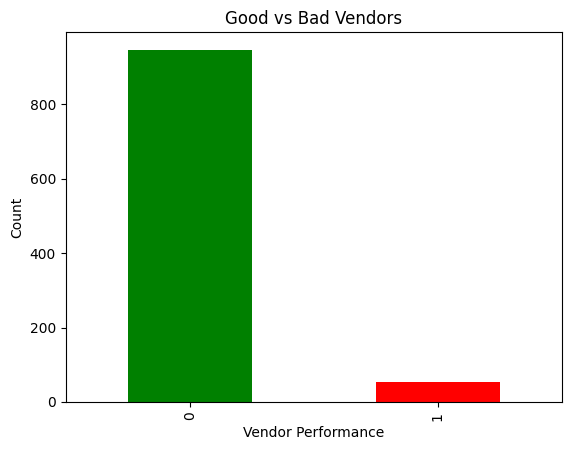

In [32]:
plt.figure()
df['Vendor_Performance'].value_counts().plot(
    kind='bar',
    color=['green', 'red']
)

plt.xlabel("Vendor Performance")
plt.ylabel("Count")
plt.title("Good vs Bad Vendors")
plt.show()


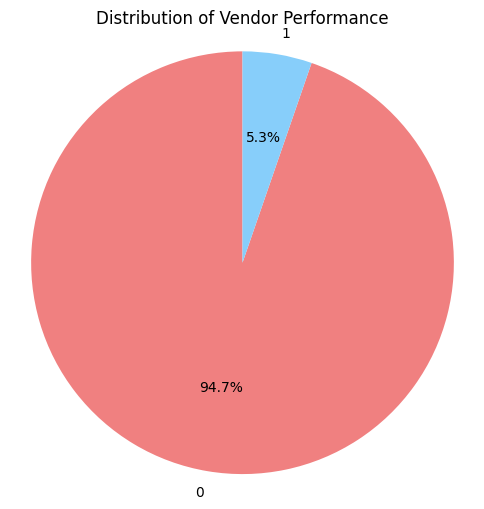

In [24]:
import matplotlib.pyplot as plt

performance_counts = df['Vendor_Performance'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Vendor Performance')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


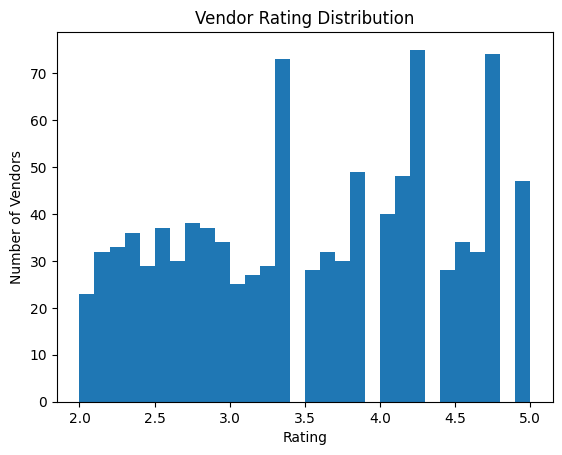

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Rating'], bins=30)
plt.xlabel("Rating")
plt.ylabel("Number of Vendors")
plt.title("Vendor Rating Distribution")
plt.show()


<Figure size 640x480 with 0 Axes>

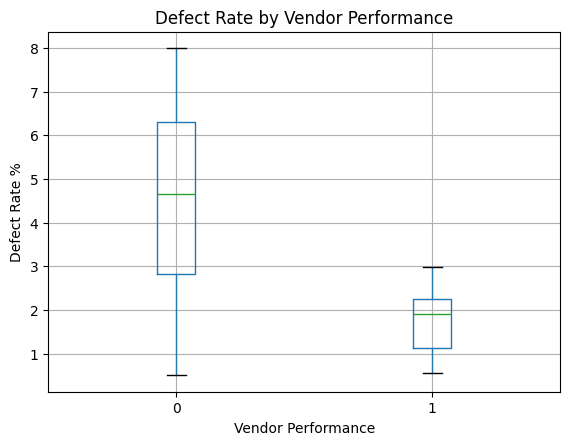

In [34]:
plt.figure()
df.boxplot(column='Defect_Rate_%', by='Vendor_Performance')
plt.xlabel("Vendor Performance")
plt.ylabel("Defect Rate %")
plt.title("Defect Rate by Vendor Performance")
plt.suptitle("")
plt.show()
